In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

In [3]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


## Reading Data

In [4]:
feature=["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

In [5]:
train='kddcup/kddcup.data_10_percent.gz'
test='kddcup/kddcup.testdata.unlabeled.gz'
test21='kddcup/nsl-kdd/KDDTest-21.txt'
train_data=pd.read_csv(train,names=feature)
# test_data=pd.read_csv(test,names=feature)

In [6]:
# test_21 = pd.read_csv(test21, names= feature)

In [7]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610296,988218.101045,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
land,494021.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0


In [10]:
# number of attack labels 
train_data['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

### Label

In [11]:
# number of attack labels 
train_data['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [12]:
# changing attack labels to their respective attack class
def change_label(df):
  df.target.replace(['back.','land.','neptune.','pod.','smurf.','teardrop.'],'Dos',inplace=True)
  df.target.replace(['guess_passwd.','imap.','ftp_write.','multihop.','phf.','spy.','warezclient.','warezmaster.'],'R2L',inplace=True)      
  df.target.replace(['ipsweep.','nmap.','portsweep.','satan.'],'Probe',inplace=True)
  df.target.replace(['buffer_overflow.','loadmodule.','perl.','rootkit.'],'U2R',inplace=True)



In [13]:
change_label(train_data)

In [14]:
# distribution of attack classes
train_data.target.value_counts()

Dos        391458
normal.     97278
Probe        4107
R2L          1126
U2R            52
Name: target, dtype: int64

In [15]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.target)

In [16]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

numeric_col = multi_data.select_dtypes(include='number').columns
data = standardization(multi_data,numeric_col)

In [17]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,intrusion
0,-0.067792,tcp,http,SF,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.,4
1,-0.067792,tcp,http,SF,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.,4
2,-0.067792,tcp,http,SF,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.,4
3,-0.067792,tcp,http,SF,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.,4
4,-0.067792,tcp,http,SF,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.067792,tcp,http,SF,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.229844,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,normal.,4
494017,-0.067792,tcp,http,SF,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-0.897417,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,normal.,4
494018,-0.067792,tcp,http,SF,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.125961,1.028094,-0.306769,-0.436950,-0.25204,-0.249464,normal.,4
494019,-0.067792,tcp,http,SF,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,0.599396,-0.282867,-1.167514,1.028094,-0.359318,-0.436950,-0.25204,-0.249464,normal.,4


In [18]:
multi_data.drop(labels= [ 'target'], axis=1, inplace=True)
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,-0.067792,tcp,http,SF,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.694315,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
1,-0.067792,tcp,http,SF,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.600011,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
2,-0.067792,tcp,http,SF,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.505707,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
3,-0.067792,tcp,http,SF,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.411403,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
4,-0.067792,tcp,http,SF,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.317100,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.067792,tcp,http,SF,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625558,0.599396,-0.282867,-1.229844,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,4
494017,-0.067792,tcp,http,SF,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625558,0.599396,-0.282867,-0.897417,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,4
494018,-0.067792,tcp,http,SF,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625558,0.599396,-0.282867,-1.125961,1.028094,-0.306769,-0.436950,-0.25204,-0.249464,4
494019,-0.067792,tcp,http,SF,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,0.625558,0.599396,-0.282867,-1.167514,1.028094,-0.359318,-0.436950,-0.25204,-0.249464,4


In [19]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
multi_data['protocol_type']= label_encoder.fit_transform(multi_data['protocol_type'])
multi_data['service']= label_encoder.fit_transform(multi_data['service'])
multi_data['flag']= label_encoder.fit_transform(multi_data['flag'])

multi_data['protocol_type'].unique()
multi_data['service'].unique()
multi_data['flag'].unique()

array([ 9,  6,  1,  7,  5,  8,  2,  4,  3,  0, 10], dtype=int64)

In [20]:
multi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null float64
protocol_type                  494021 non-null int32
service                        494021 non-null int32
flag                           494021 non-null int32
src_bytes                      494021 non-null float64
dst_bytes                      494021 non-null float64
land                           494021 non-null float64
wrong_fragment                 494021 non-null float64
urgent                         494021 non-null float64
hot                            494021 non-null float64
num_failed_logins              494021 non-null float64
logged_in                      494021 non-null float64
num_compromised                494021 non-null float64
root_shell                     494021 non-null float64
su_attempted                   494021 non-null float64
num_root                       494021 non-null float64
num_file_creati

In [21]:
#multi_data = multi_data[0:100000]

In [104]:
X = multi_data.drop(["intrusion"],axis =1)
y = multi_data["intrusion"]

In [105]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

selector = SelectPercentile(mutual_info_classif, percentile=35)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape


(494021, 14)

In [106]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['protocol_type',
 'service',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate']

In [25]:
df = multi_data[['protocol_type',
                 'service',
                 'src_bytes',
                 'dst_bytes',
                 'logged_in',
                 'count',
                 'srv_count',
                 'srv_diff_host_rate',
                 'dst_host_count',
                 'dst_host_srv_count',
                 'dst_host_same_srv_rate',
                 'dst_host_diff_srv_rate',
                 'dst_host_same_src_port_rate',
                 'dst_host_srv_diff_host_rate',
                  'intrusion']]
df.to_csv('kddcup_processed.csv')

In [3]:
df = pd.read_csv('kddcup_processed.csv')
df['intrusion'].value_counts()

0    391458
4     97278
1      4107
2      1126
3        52
Name: intrusion, dtype: int64

In [107]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.20, random_state=42)

In [27]:
#X_train=X_train.values
#X_test=X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [98]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# CNN

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

verbose, epoch, batch_size = 1, 100, 4
activationFunction='relu'

def CNN():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(5, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = CNN()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 13, 128)           384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 6, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3845      
Total params: 4,229
Trainable params: 4,229
Non-trainable params: 0
_________________________________________________________________


In [31]:
modelhistory = cnnmodel.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/5
79043/79043 [==============================] - 200s 3ms/step - loss: 0.0428 - accuracy: 0.9895 - val_loss: 0.0239 - val_accuracy: 0.9934
Epoch 2/5
79043/79043 [==============================] - 205s 3ms/step - loss: 0.0399 - accuracy: 0.9907 - val_loss: 0.0213 - val_accuracy: 0.9934
Epoch 3/5
79043/79043 [==============================] - 206s 3ms/step - loss: 0.0377 - accuracy: 0.9912 - val_loss: 0.0188 - val_accuracy: 0.9950
Epoch 4/5
79043/79043 [==============================] - 205s 3ms/step - loss: 0.0368 - accuracy: 0.9915 - val_loss: 0.0219 - val_accuracy: 0.9942
Epoch 5/5
79043/79043 [==============================] - 204s 3ms/step - loss: 0.0400 - accuracy: 0.9917 - val_loss: 0.0184 - val_accuracy: 0.9959


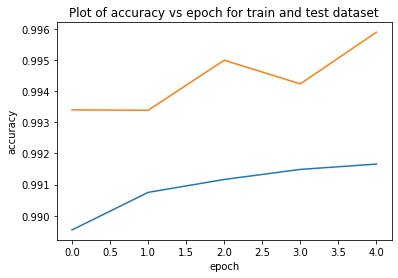

In [32]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

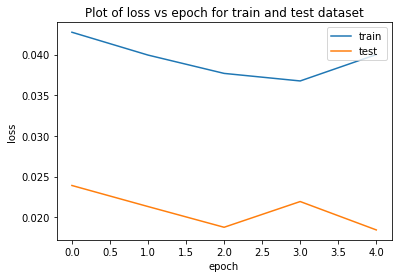

In [33]:
# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [34]:
cnnpredictions = cnnmodel.predict(X_test, verbose=1)
cnn_predict=np.argmax(cnnpredictions,axis=1)

y_pred = cnnmodel.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

cnn_acc = accuracy_score(y_pred, y_test)
cnn_prec = precision_score(y_pred, y_test,average='weighted')
cnn_rec = recall_score(y_pred, y_test,average='weighted')
cnn_f1 = f1_score(y_pred, y_test,average='weighted')

3088/3088 [==============================] - 1s 426us/step


In [99]:
storeResults('CNN',cnn_acc,cnn_prec,cnn_rec,cnn_f1)

# LSTM

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf

# define a function to build the keras model
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()
    
    model.add(LSTM(32, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(64,activation='relu', return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(128, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(256, activation='relu', return_sequences=False))
    model.add(Dropout(d))
   
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # compile model
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model(input_shape=(14,1))
#print(model.summary())

In [36]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=5, verbose=1, steps_per_epoch=500, validation_steps=500)

Epoch 1/5
500/500 [==============================] - 74s 127ms/step - loss: 1.0173e-07 - accuracy: 0.7825 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 2/5
500/500 [==============================] - 63s 126ms/step - loss: 9.2387e-08 - accuracy: 0.7988 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 3/5
500/500 [==============================] - 63s 126ms/step - loss: 1.0346e-07 - accuracy: 0.7747 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 4/5
500/500 [==============================] - 63s 126ms/step - loss: 8.9346e-08 - accuracy: 0.8059 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 5/5
500/500 [==============================] - 63s 126ms/step - loss: 9.8267e-08 - accuracy: 0.7901 - val_loss: 9.0265e-08 - val_accuracy: 0.8040


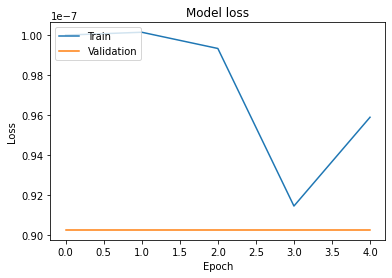

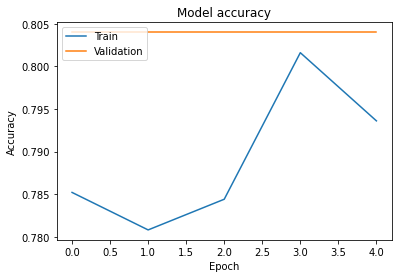

3088/3088 [==============================] - 81s 26ms/step


In [37]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)


#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

lstm_acc = accuracy_score(y_pred, y_test)
lstm_prec = precision_score(y_pred, y_test,average='weighted')
lstm_rec = recall_score(y_pred, y_test,average='weighted')
lstm_f1 = f1_score(y_pred, y_test,average='weighted')

In [100]:
storeResults('LSTM',lstm_acc,lstm_prec,lstm_rec,lstm_f1)

# RNN

In [38]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf

# define a function to build the keras model
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()
    
    model.add(SimpleRNN(32, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(SimpleRNN(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))
        
    model.add(SimpleRNN(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(SimpleRNN(256, input_shape=input_shape, activation='relu', return_sequences=False))
    model.add(Dropout(d))
   
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # compile model
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model(input_shape=(14,1))
#print(model.summary())

In [39]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=5, verbose=1, steps_per_epoch=500, validation_steps=500)

Epoch 1/5
500/500 [==============================] - 29s 54ms/step - loss: 9.8724e-08 - accuracy: 0.7845 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 2/5
500/500 [==============================] - 26s 52ms/step - loss: 9.4735e-08 - accuracy: 0.7921 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 3/5
500/500 [==============================] - 26s 52ms/step - loss: 9.3409e-08 - accuracy: 0.7936 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 4/5
500/500 [==============================] - 26s 53ms/step - loss: 9.9307e-08 - accuracy: 0.7846 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 5/5
500/500 [==============================] - 26s 52ms/step - loss: 9.3938e-08 - accuracy: 0.7975 - val_loss: 9.0265e-08 - val_accuracy: 0.8040


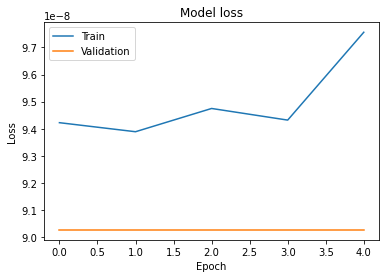

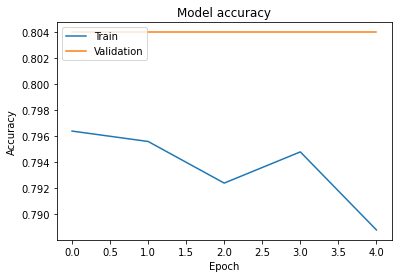

3088/3088 [==============================] - 32s 10ms/step


In [40]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)


#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

rnn_acc = accuracy_score(y_pred, y_test)
rnn_prec = precision_score(y_pred, y_test,average='weighted')
rnn_rec = recall_score(y_pred, y_test,average='weighted')
rnn_f1 = f1_score(y_pred, y_test,average='weighted')

In [101]:
storeResults('RNN',rnn_acc,rnn_prec,rnn_rec,rnn_f1)

# GRU

In [41]:
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf

# define a function to build the keras model
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()
    
    model.add(GRU(32, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(GRU(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))
        
    model.add(GRU(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(GRU(256, input_shape=input_shape, activation='relu', return_sequences=False))
    model.add(Dropout(d))
   
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # compile model
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model(input_shape=(14,1))
#print(model.summary())

In [42]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=5, verbose=1, steps_per_epoch=500, validation_steps=500)

Epoch 1/5
500/500 [==============================] - 79s 152ms/step - loss: 9.2972e-08 - accuracy: 0.7970 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 2/5
500/500 [==============================] - 75s 150ms/step - loss: 9.7049e-08 - accuracy: 0.7893 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 3/5
500/500 [==============================] - 76s 152ms/step - loss: 1.0125e-07 - accuracy: 0.7820 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 4/5
500/500 [==============================] - 75s 150ms/step - loss: 8.9159e-08 - accuracy: 0.8025 - val_loss: 9.0265e-08 - val_accuracy: 0.8040
Epoch 5/5
500/500 [==============================] - 75s 151ms/step - loss: 9.8886e-08 - accuracy: 0.7862 - val_loss: 9.0265e-08 - val_accuracy: 0.8040


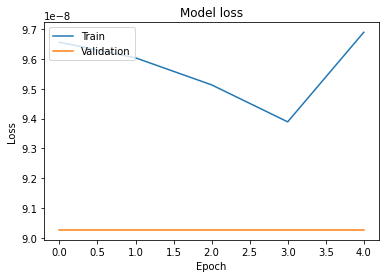

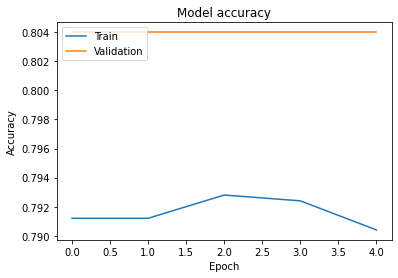

3088/3088 [==============================] - 97s 31ms/step


In [43]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)


#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

gru_acc = accuracy_score(y_pred, y_test)
gru_prec = precision_score(y_pred, y_test,average='weighted')
gru_rec = recall_score(y_pred, y_test,average='weighted')
gru_f1 = f1_score(y_pred, y_test,average='weighted')

In [102]:
storeResults('GRU',gru_acc,gru_prec,gru_rec,gru_f1)

# LSTM + GRU + RNN

In [44]:
from keras.models import Sequential
from keras.layers import Dense, GRU, LSTM, SimpleRNN
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf

# define a function to build the keras model
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()
    
    model.add(LSTM(32, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(GRU(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))
        
    model.add(SimpleRNN(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(GRU(256, input_shape=input_shape, activation='relu', return_sequences=False))
    model.add(Dropout(d))
   
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # compile model
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model1 = create_model(input_shape=(14,1))
#print(model.summary())

In [53]:
history=model1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=2, verbose=1, steps_per_epoch=5000, validation_steps=5000)

Epoch 1/5
5000/5000 [==============================] - 490s 98ms/step - loss: 9.6381e-08 - accuracy: 0.7910 - val_loss: 9.7668e-08 - val_accuracy: 0.7879
Epoch 2/5
5000/5000 [==============================] - 489s 98ms/step - loss: 9.7036e-08 - accuracy: 0.7888 - val_loss: 9.7668e-08 - val_accuracy: 0.7879
Epoch 3/5
5000/5000 [==============================] - 491s 98ms/step - loss: 9.4485e-08 - accuracy: 0.7946 - val_loss: 9.7668e-08 - val_accuracy: 0.7879
Epoch 4/5
5000/5000 [==============================] - 490s 98ms/step - loss: 9.4152e-08 - accuracy: 0.7943 - val_loss: 9.7668e-08 - val_accuracy: 0.7879
Epoch 5/5
5000/5000 [==============================] - 490s 98ms/step - loss: 9.8395e-08 - accuracy: 0.7877 - val_loss: 9.7668e-08 - val_accuracy: 0.7879


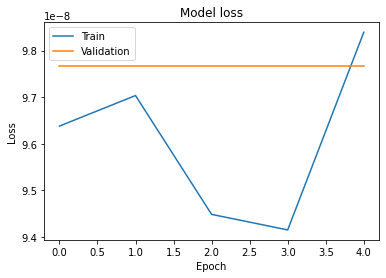

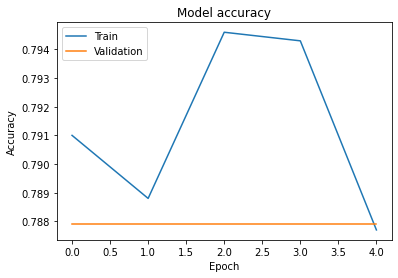

3088/3088 [==============================] - 79s 26ms/step


In [54]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

y_pred = model1.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)


#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

ense_acc = accuracy_score(y_pred, y_test)
ense_prec = precision_score(y_pred, y_test,average='weighted')
ense_rec = recall_score(y_pred, y_test,average='weighted')
ense_f1 = f1_score(y_pred, y_test,average='weighted')

In [108]:
storeResults('LSTM+RNN+GRU',ense_acc,ense_prec,ense_rec,ense_f1)

# CNN + BiLSTM

In [55]:
import tensorflow as tf
tf.keras.backend.clear_session()

model2 = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=128,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model2.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 14, 128)           768       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 13, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 13, 64)            24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 32)            6176      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 11, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 11, 256)           1

In [57]:
modelhistory = model2.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/5
79043/79043 [==============================] - 771s 10ms/step - loss: 0.0067 - acc: 0.9850 - val_loss: 0.0046 - val_acc: 0.9858
Epoch 2/5
79043/79043 [==============================] - 769s 10ms/step - loss: 0.0060 - acc: 0.9876 - val_loss: 0.0039 - val_acc: 0.9888
Epoch 3/5
79043/79043 [==============================] - 774s 10ms/step - loss: 0.0055 - acc: 0.9888 - val_loss: 0.0038 - val_acc: 0.9888
Epoch 4/5
79043/79043 [==============================] - 772s 10ms/step - loss: 0.0052 - acc: 0.9892 - val_loss: 0.0037 - val_acc: 0.9895
Epoch 5/5
79043/79043 [==============================] - 771s 10ms/step - loss: 0.0049 - acc: 0.9896 - val_loss: 0.0035 - val_acc: 0.9897


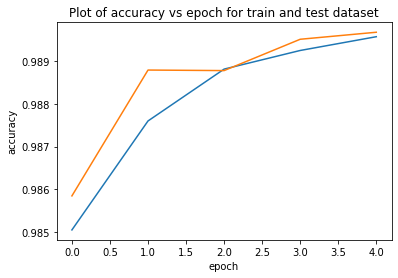

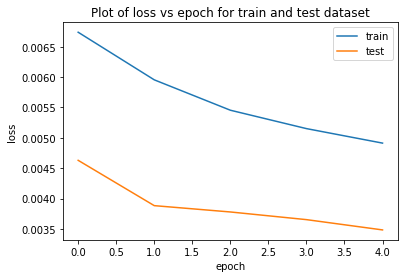

In [58]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['acc'])
plt.plot(modelhistory.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [59]:
y_pred = model2.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)


#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

ense_acc = accuracy_score(y_pred, y_test)
ense_prec = precision_score(y_pred, y_test,average='weighted')
ense_rec = recall_score(y_pred, y_test,average='weighted')
ense_f1 = f1_score(y_pred, y_test,average='weighted')

3088/3088 [==============================] - 11s 3ms/step


In [123]:
storeResults('CNN+BiLSTM',ense_acc,ense_prec,ense_rec,ense_f1)

# Machine Learning

In [64]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.20, random_state=42)

# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=5,splitter='best',min_samples_split=2,criterion='entropy',random_state=500)

# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = tree.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [109]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1)

In [91]:
from sklearn.model_selection import KFold   
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, random_state = None)
score = cross_val_score(tree, X_train, y_train, cv = k_fold)

mean_dt = sum(score) / len(score)
print('Mean Score:', mean_dt)

Mean Score: 0.9959500000000002


# Logistic Regression

In [67]:
# Logistic Regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression(random_state=10,solver='lbfgs',max_iter=50,multi_class='auto',C=1.0)

log.fit(X_train,y_train)

y_pred = log.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [110]:
storeResults('Logistic Regression',lr_acc,lr_prec,lr_rec,lr_f1)

In [92]:
from sklearn.model_selection import KFold   
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, random_state = None)
score = cross_val_score(log, X_train, y_train, cv = k_fold)

mean_lr = sum(score) / len(score)

print('Mean Score:', mean_lr)

Mean Score: 0.9722


# SVM

In [69]:
from sklearn.svm import SVC

# instantiate the model 
svm = SVC(random_state=50,max_iter=50, tol=1e-4)

# fit the model 
svm.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = svm.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test,average='weighted')
svc_rec = recall_score(y_pred, y_test,average='weighted')
svc_f1 = f1_score(y_pred, y_test,average='weighted')

In [111]:
storeResults('Support Vector Machine',svc_acc,svc_prec,svc_rec,svc_f1)

In [93]:
k_fold = KFold(n_splits = 10, random_state = None)
score = cross_val_score(svm, X_train, y_train, cv = k_fold)

mean_svm = sum(score) / len(score)

print('Mean Score:', mean_svm)

Mean Score: 0.9468250000000001


# Naive Bayes

In [71]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB

# instantiate the model
nb=  GaussianNB(var_smoothing=1e-9)

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')

In [112]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1)

In [94]:
k_fold = KFold(n_splits = 10, random_state = None)
score = cross_val_score(nb, X_train, y_train, cv = k_fold)

mean_nb = sum(score) / len(score)

print('Mean Score:', mean_nb)

Mean Score: 0.897025


# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=5,  max_features='sqrt',
                           bootstrap = True, random_state = 100, max_samples = None)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [113]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

In [95]:
k_fold = KFold(n_splits = 10, random_state = None)
score = cross_val_score(rf, X_train, y_train, cv = k_fold)

mean_rf = sum(score) / len(score)

print('Mean Score:', mean_rf)

Mean Score: 0.9978250000000001


# DT + RF + SVM

In [90]:
from sklearn.ensemble import VotingClassifier

svm = SVC(random_state=50,max_iter=50, tol=1e-4,probability=True)

eclf1 = VotingClassifier(estimators=[('rf', rf), ('dt', tree), ('svm', svm)], voting='soft')
eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test, average='weighted')
vot_rec = recall_score(y_pred, y_test, average='weighted')
vot_f1 = f1_score(y_pred, y_test, average='weighted')

In [114]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

In [96]:
k_fold = KFold(n_splits = 10, random_state = None)
score = cross_val_score(rf, X_train, y_train, cv = k_fold)

mean_vot = sum(score) / len(score)

print('Mean Score:', mean_vot)

Mean Score: 0.9978250000000001


# Stacking Classifier

In [86]:
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier

estimators = [('rf', rf),('dt', tree)]

clf = StackingClassifier(estimators=estimators, final_estimator=ExtraTreesClassifier())

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [124]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

In [97]:
k_fold = KFold(n_splits = 10, random_state = None)
score = cross_val_score(clf, X_train, y_train, cv = k_fold)

mean_st = sum(score) / len(score)

print('Mean Score:', mean_vot)

Mean Score: 1


# Comparison

In [125]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score
                      })

In [126]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,CNN,0.996,0.996,0.996,0.996
1,LSTM,0.793,1.000,0.793,0.885
2,RNN,0.793,1.000,0.793,0.885
3,GRU,0.793,1.000,0.793,0.885
4,LSTM+RNN+GRU,0.890,0.993,0.990,0.991
5,Decision Tree,0.996,0.998,0.996,0.997
6,Logistic Regression,0.973,0.974,0.973,0.973
7,Support Vector Machine,0.950,0.951,0.950,0.950
8,Naive Bayes,0.900,0.907,0.900,0.869
9,Random Forest,0.998,0.998,0.998,0.998


# Graph

In [127]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

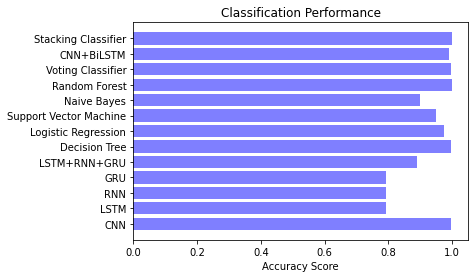

In [128]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

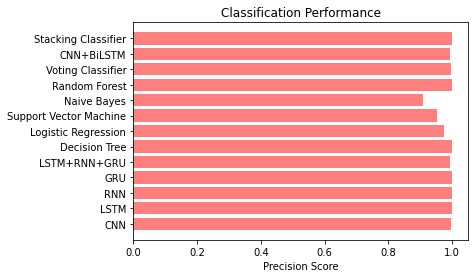

In [129]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

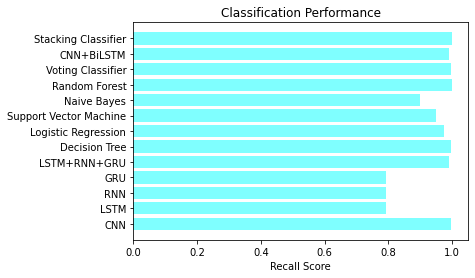

In [130]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

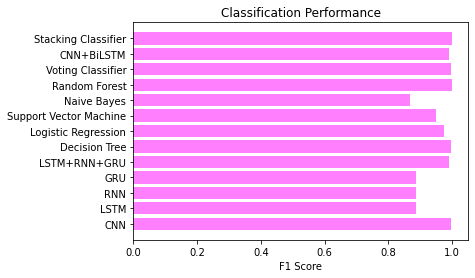

In [131]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Modelling

In [132]:
import joblib
filename = 'model.sav'
joblib.dump(clf, filename)

['model.sav']